In [134]:
#Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Limpieza 2020 - desviación estándar

In [135]:
#Leer excel - datos 2020
df2020=pd.read_excel('Gastos y costos 20-23.xlsx',sheet_name="2020",skiprows=5)
df2020.head()

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,GASTO,DESCRIPCION,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,POLIZA,Columna1
0,2020-01-01,39408,BD20F436-72CC-4BE2-AD37-5999D71AA391,ARE080115PBA,ARSI RENTA SA DE CV,MAQUINARIA,NaN,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00,I,Vigente,NaN,14051.72
1,2020-01-01,0001010100750847116902,85AEAC2E-6395-44A0-9CB9-754D06893375,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,NaN,COMISION COBRADA,1.0,490.00,78.40,0.0,0.0,568.40,568.40,I,Vigente,NaN,0.00
2,2020-01-01,0001010100752163714102,BD0DFE85-D776-41CB-9C5C-4FA7923E687A,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,NaN,COMISION COBRADA,1.0,195.00,31.20,0.0,0.0,226.20,226.20,I,Vigente,NaN,0.00
3,2020-01-01,3663,EF4504D6-830D-415C-AF03-80CF54C5E28E,PSS120625C86,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES,NaN,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33,I,Vigente,NaN,0.00
4,2020-01-01,2849,EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,ENA7006081P0,ELECTROTERMICA NACIONAL SA DE CV,COMPRAS,NaN,Pago,1.0,0.00,NaN,0.0,0.0,0.00,0.00,P,Vigente,NaN,0.00


In [136]:
df2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        3342 non-null   datetime64[ns]
 1   FOLIO        3153 non-null   object        
 2   UUID         3342 non-null   object        
 3   RFC          3342 non-null   object        
 4   PROVEEDOR    3342 non-null   object        
 5   TIPO GASTO   3342 non-null   object        
 6   GASTO        840 non-null    object        
 7   DESCRIPCION  3342 non-null   object        
 8   TC           2951 non-null   float64       
 9   IMPORTE      3308 non-null   float64       
 10  IVA          3074 non-null   float64       
 11  RET ISR      3342 non-null   float64       
 12  RET IVA      3342 non-null   float64       
 13  TOTAL MX     3342 non-null   float64       
 14  TOTAL SAT    3342 non-null   float64       
 15  TIPO         3341 non-null   object        
 16  STATUS

In [137]:
#Numéricas y cualitativas 2020
cualitativas_2020=df2020[['FECHA','FOLIO','UUID','RFC','PROVEEDOR','TIPO GASTO','GASTO','DESCRIPCION','TIPO','STATUS','POLIZA']]
numeric_2020=df2020[['TC','IMPORTE','IVA','RET ISR','RET IVA','TOTAL MX','TOTAL SAT','Columna1']]

In [138]:
#Limpiar nulos: cualitativas 2020
clean_cuali_2020=cualitativas_2020.fillna('Unknown')
nulos_cualitativas_2020=clean_cuali_2020.isnull().sum().sum()
nulos_cualitativas_2020#Comprobación

0

In [139]:
#Limpiar nulos: numéricas 2020
clean_numeric_2020=numeric_2020.fillna(round(numeric_2020.mean(),1))
nulos_numeric_2020=clean_numeric_2020.isnull().sum().sum()
nulos_numeric_2020#Comprobación

0

<Figure size 1500x800 with 0 Axes>

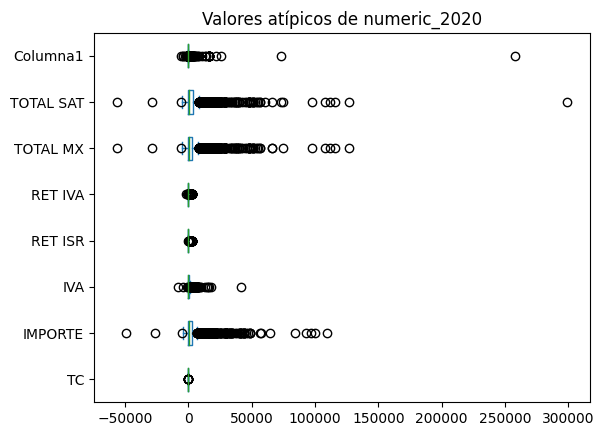

In [140]:
#Boxplots de todo numeric_2020
fig=plt.figure(figsize=(15,8))
numeric_2020.plot(kind='box',vert=False)
plt.title("Valores atípicos de numeric_2020")
plt.show()

In [141]:
y=numeric_2020
ls_y=y.mean()+3*y.std()
li_y=y.mean()-3*y.std()
#Encontrar insiders 2020
insiders_2020=numeric_2020[(y<ls_y)&(y>li_y)]
insiders_2020

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00,14051.72
1,1.0,490.00,78.40,0.0,0.0,568.40,568.40,0.00
2,1.0,195.00,31.20,0.0,0.0,226.20,226.20,0.00
3,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33,0.00
4,1.0,0.00,NaN,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
3337,1.0,129.79,20.21,0.0,0.0,150.00,150.00,0.00
3338,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37,0.00
3339,1.0,163.79,26.21,0.0,0.0,190.00,190.00,0.00
3340,1.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00


In [142]:
clean_num_2020=insiders_2020.copy()
clean_num_2020=clean_num_2020.fillna(round(insiders_2020.mean(),1))
clean_num_2020

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00,14051.72
1,1.0,490.00,78.40,0.0,0.0,568.40,568.40,0.00
2,1.0,195.00,31.20,0.0,0.0,226.20,226.20,0.00
3,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33,0.00
4,1.0,0.00,399.00,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
3337,1.0,129.79,20.21,0.0,0.0,150.00,150.00,0.00
3338,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37,0.00
3339,1.0,163.79,26.21,0.0,0.0,190.00,190.00,0.00
3340,1.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00


In [143]:
#Unión de cualitativas y numéricas 2020
clean_2020=pd.concat([clean_cuali_2020,clean_num_2020],axis=1)

In [144]:
#Comprobación final
nulos2020=clean_2020.isnull().sum().sum()
nulos2020

0

Limpieza 2021 - desviación estándar

In [145]:
#Leer excel - datos 2021
df2021=pd.read_excel('Gastos y costos 20-23.xlsx',sheet_name="2021",skiprows=3)
df2021.head()

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,POLIZA
0,2021-01-01,0001010100750847116902,71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,1.0,490.00,78.40,0.0,0.0,568.4,568.4,I,Vigente,0
1,2021-01-01,0001010100752163714102,B8AEDE83-CC76-404C-A611-6B5A87BA561F,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,1.0,345.00,55.20,0.0,0.0,400.2,400.2,I,Vigente,0
2,2021-01-01,19788,19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,ESI9612311E7,"ELECTRONICOS Y SIMILARES, S.A. DE C.V.",COMPRAS,MOTO E7 PLUS AZUL 64GB 4RAM,PUE,1.0,3447.41,551.59,0.0,0.0,3999.0,3999.0,I,Vigente,0
3,2021-01-01,211781,EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 6/36 de 03/12/2...,PPD,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6,I,Vigente,0
4,2021-01-01,211782,C16F79B5-FB35-4BFC-AF84-708B24F500BB,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 6/36 de 03/12/2...,PPD,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3,I,Vigente,0


In [146]:
df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        3035 non-null   datetime64[ns]
 1   FOLIO        2888 non-null   object        
 2   UUID         3035 non-null   object        
 3   RFC          3035 non-null   object        
 4   PROVEEDOR    3035 non-null   object        
 5   TIPO GASTO   3035 non-null   object        
 6   DESCRIPCION  3035 non-null   object        
 7   MP           2381 non-null   object        
 8   TC           3035 non-null   float64       
 9   IMPORTE      3035 non-null   float64       
 10  IVA          3035 non-null   float64       
 11  RET ISR      3035 non-null   float64       
 12  RET IVA      3035 non-null   float64       
 13  TOTAL MX     3035 non-null   float64       
 14  TOTAL SAT    3035 non-null   float64       
 15  TIPO         3035 non-null   object        
 16  STATUS

In [147]:
#Numéricas y cualitativas 2021
cualitativas_2021=df2021[['FECHA','FOLIO','UUID','RFC','PROVEEDOR','TIPO GASTO','DESCRIPCION','MP','TIPO','STATUS','POLIZA']]
numeric_2021=df2021[['TC','IMPORTE','IVA','RET ISR','RET IVA','TOTAL MX','TOTAL SAT']]

In [148]:
#Limpiar nulos: cualitativas 2021
clean_cuali_2021=cualitativas_2021.fillna('Unknown')
nulos_cualitativas_2021=clean_cuali_2021.isnull().sum().sum()
nulos_cualitativas_2021#Comprobación

0

In [149]:
#Limpiar nulos: numéricas 2021
clean_numeric_2021=numeric_2021.fillna(round(numeric_2021.mean(),1))
nulos_numeric_2021=clean_numeric_2021.isnull().sum().sum()
nulos_numeric_2021#Comprobación

0

<Figure size 1500x800 with 0 Axes>

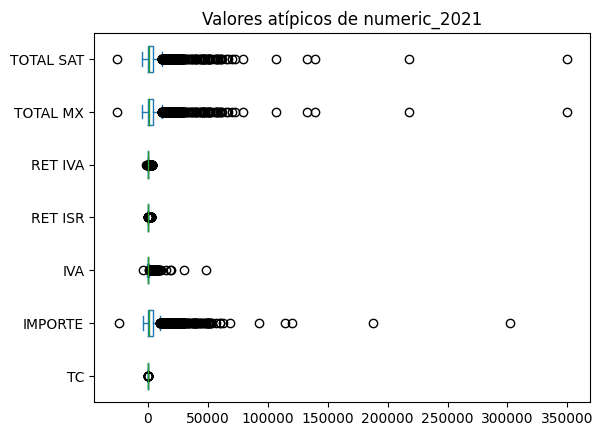

In [150]:
#Boxplots de todo numeric_2021
fig=plt.figure(figsize=(15,8))
numeric_2021.plot(kind='box',vert=False)
plt.title("Valores atípicos de numeric_2021")
plt.show()

In [151]:
y=numeric_2021
ls_y=y.mean()+3*y.std()
li_y=y.mean()-3*y.std()
#Encontrar insiders 2021
insiders_2021=numeric_2021[(y<ls_y)&(y>li_y)]
insiders_2021

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,490.00,78.40,0.0,0.0,568.40,568.40
1,1.0,345.00,55.20,0.0,0.0,400.20,400.20
2,1.0,3447.41,551.59,0.0,0.0,3999.00,3999.00
3,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
4,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
...,...,...,...,...,...,...,...
3030,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3031,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3032,1.0,22826.46,705.58,0.0,0.0,23532.04,23532.04
3033,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [152]:
clean_num_2021=insiders_2021.copy()
clean_num_2021=clean_num_2021.fillna(round(insiders_2021.mean(),1))
clean_num_2021

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,490.00,78.40,0.0,0.0,568.40,568.40
1,1.0,345.00,55.20,0.0,0.0,400.20,400.20
2,1.0,3447.41,551.59,0.0,0.0,3999.00,3999.00
3,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
4,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
...,...,...,...,...,...,...,...
3030,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3031,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3032,1.0,22826.46,705.58,0.0,0.0,23532.04,23532.04
3033,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [153]:
#Unión de cualitativas y numéricas 2021
clean_2021=pd.concat([clean_cuali_2021,clean_num_2021],axis=1)

In [154]:
#Comprobación final
nulos2021=clean_2021.isnull().sum().sum()
nulos2021

0

Limpieza 2022 - rango intercuartílico

In [155]:
#Leer excel - datos 2022
df2022=pd.read_excel('Gastos y costos 20-23.xlsx',sheet_name="2022",skiprows=3)
df2022.head()

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,2022-01-01,280108,9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,PPD,1.0,5551.38,888.22,0.0,0.0,NaN,6439.6,6439.6,I,Vigente,PE02-ENE22
1,2022-01-01,280109,7E00E776-A839-4D57-B291-411109164B2F,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,PPD,1.0,5551.98,888.32,0.0,0.0,NaN,6440.3,6440.3,I,Vigente,PE03-ENE22
2,2022-01-01,007817297284,BB6585C1-3B54-4130-AFD0-1867C3764821,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Servicios de Facturación,PUE,1.0,0.00,0.00,0.0,0.0,NaN,0.0,0.0,I,Vigente,NaN
3,2022-01-01,5595,B5E4B4EB-6C2F-11EC-BB9D-00155D014009,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.0,0.0,P,Vigente,NaN
4,2022-01-01,5614,BB6756D1-6CCD-11EC-947D-00155D014407,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.0,0.0,P,Vigente,NaN


In [156]:
df2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        2577 non-null   datetime64[ns]
 1   Folio        2475 non-null   object        
 2   UUID         2577 non-null   object        
 3   RFC          2577 non-null   object        
 4   Proveedor    2577 non-null   object        
 5   TIPO GASTO   2577 non-null   object        
 6   Descripción  2577 non-null   object        
 7   MP           2024 non-null   object        
 8   TC           1941 non-null   float64       
 9   Importe      2577 non-null   float64       
 10  IVA          2577 non-null   float64       
 11  RET ISR      2577 non-null   float64       
 12  RET IVA      2577 non-null   float64       
 13  Otros        0 non-null      float64       
 14  TOTAL MX     2577 non-null   float64       
 15  TOTAL SAT    2577 non-null   float64       
 16  Tipo  

In [157]:
#Numéricas y cualitativas 2022
cualitativas_2022=df2022[['Fecha','Folio','UUID','RFC','Proveedor','TIPO GASTO','Descripción','MP','Tipo','Status','Poliza']]
numeric_2022=df2022[['TC','Importe','IVA','RET ISR','RET IVA','Otros','TOTAL MX','TOTAL SAT']]

In [158]:
#Limpiar nulos: cualitativas 2022
clean_cuali_2022=cualitativas_2022.fillna('Unknown')
nulos_cualitativas_2022=clean_cuali_2022.isnull().sum().sum()
nulos_cualitativas_2022#Comprobación

0

In [159]:
#Limpiar nulos: numéricas 2022
clean_numeric_2022=numeric_2022.fillna(round(numeric_2022.mean(),1))
clean_numeric_2022['Otros']=numeric_2022['Otros'].fillna(0) #Todos eran NaN
nulos_numeric_2022=clean_numeric_2022.isnull().sum().sum()
nulos_numeric_2022#Comprobación

0

<Figure size 1500x800 with 0 Axes>

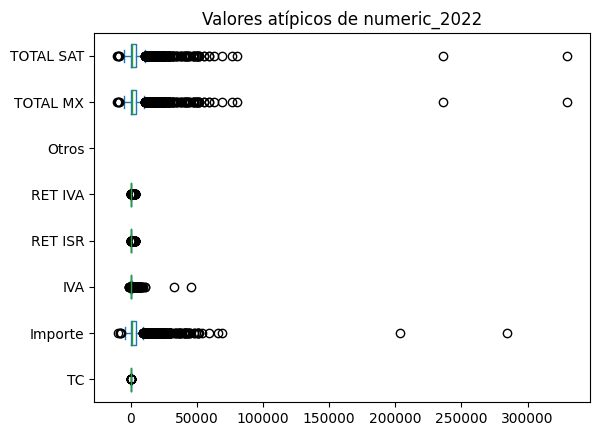

In [160]:
#Boxplots de todo numeric_2022
fig=plt.figure(figsize=(15,8))
numeric_2022.plot(kind='box',vert=False)
plt.title("Valores atípicos de numeric_2022")
plt.show()

In [161]:
y=numeric_2022
p25_2022=y.quantile(0.25)
p75_2022=y.quantile(0.75)
iqr_2022=p75_2022-p25_2022

ls_iq_2022=p75_2022+1.5*iqr_2022
li_iq_2022=p25_2022-1.5*iqr_2022

#Encontrar insiders 2022
insiders_2022=numeric_2022[(y<ls_iq_2022)&(y>li_iq_2022)]
insiders_2022

,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT
0,NaN,5551.38,888.22,NaN,NaN,NaN,6439.6,6439.6
1,NaN,5551.98,888.32,NaN,NaN,NaN,6440.3,6440.3
2,NaN,0.00,0.00,NaN,NaN,NaN,0.0,0.0
3,NaN,0.00,0.00,NaN,NaN,NaN,0.0,0.0
4,NaN,0.00,0.00,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...
2572,NaN,0.00,0.00,NaN,NaN,NaN,0.0,0.0
2573,NaN,NaN,516.32,NaN,NaN,NaN,NaN,NaN
2574,NaN,0.00,0.00,NaN,NaN,NaN,0.0,0.0
2575,NaN,0.00,0.00,NaN,NaN,NaN,0.0,0.0


In [162]:
clean_num_2022=insiders_2022.copy()
clean_num_2022=clean_num_2022.fillna(round(insiders_2022.mean(),1))
clean_num_2022['TC']=clean_num_2022['TC'].fillna(0)
clean_num_2022['RET ISR']=clean_num_2022['RET ISR'].fillna(0)
clean_num_2022['RET IVA']=clean_num_2022['RET IVA'].fillna(0)
clean_num_2022['Otros']=clean_num_2022['Otros'].fillna(0)

In [163]:
#Comprobación clean num 2022
nulos_clean_num_2022=clean_num_2022.isnull().sum().sum()
nulos_clean_num_2022

0

In [164]:
#Unión de cualitativas y numéricas 2022
clean_2022=pd.concat([clean_cuali_2022,clean_num_2022],axis=1)

In [165]:
#Comprobación final
nulos2022=clean_2022.isnull().sum().sum()
nulos2022

0

Limpieza 2023 - rango intercuartílico

In [166]:
#Leer excel - datos 2023
df2023=pd.read_excel('Gastos y costos 20-23.xlsx',sheet_name="2023",skiprows=3)
df2023.head()

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00,P,Vigente,NaN
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00,P,Vigente,NaN
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,99.0,1.0,5551.38,888.22,0.0,0.0,NaN,6439.60,6439.60,I,Vigente,PE01-ENE23
3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,PPD,99.0,1.0,5551.98,888.32,0.0,0.0,NaN,6440.30,6440.30,I,Vigente,PE02-ENE23
4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,PPD,99.0,1.0,8454.37,1352.70,0.0,0.0,NaN,9807.07,9807.07,I,Vigente,PE03-ENE23


In [167]:
df2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        397 non-null    datetime64[ns]
 1   Folio        384 non-null    object        
 2   UUID         397 non-null    object        
 3   RFC          397 non-null    object        
 4   Proveedor    397 non-null    object        
 5   TIPO GASTO   389 non-null    object        
 6   Descripción  397 non-null    object        
 7   MP           326 non-null    object        
 8   FP           326 non-null    float64       
 9   TC           397 non-null    float64       
 10  Importe      397 non-null    float64       
 11  IVA          397 non-null    float64       
 12  RET ISR      397 non-null    float64       
 13  RET IVA      397 non-null    float64       
 14  Otros        0 non-null      float64       
 15  TOTAL MX     397 non-null    float64       
 16  TOTAL SA

In [168]:
#Numéricas y cualitativas 2023
cualitativas_2023=df2023[['Fecha','Folio','UUID','RFC','Proveedor','TIPO GASTO','Descripción','MP','Tipo','Status','Poliza']]
numeric_2023=df2023[['FP','TC','Importe','IVA','RET ISR','RET IVA','Otros','TOTAL MX','TOTAL SAT']]

In [169]:
#Limpiar nulos: cualitativas 2023
clean_cuali_2023=cualitativas_2023.fillna('Unknown')
nulos_cualitativas_2023=clean_cuali_2023.isnull().sum().sum()
nulos_cualitativas_2023#Comprobación

0

In [170]:
#Limpiar nulos: numéricas 2023
clean_numeric_2023=numeric_2023.fillna(round(numeric_2023.mean(),1))
clean_numeric_2023['Otros']=numeric_2023['Otros'].fillna(0) #Todos eran NaN
nulos_numeric_2023=clean_numeric_2023.isnull().sum().sum()
nulos_numeric_2023#Comprobación

0

<Figure size 1500x800 with 0 Axes>

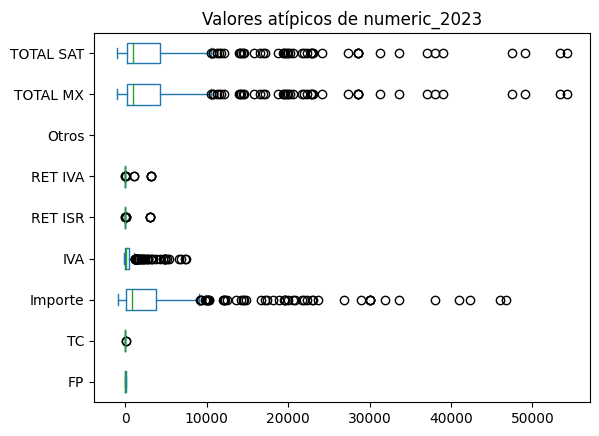

In [171]:
#Boxplots de todo numeric_2023
fig=plt.figure(figsize=(15,8))
numeric_2023.plot(kind='box',vert=False)
plt.title("Valores atípicos de numeric_2023")
plt.show()

In [172]:
y=numeric_2023
p25_2023=y.quantile(0.25)
p75_2023=y.quantile(0.75)
iqr_2023=p75_2023-p25_2023

ls_iq_2023=p75_2023+1.5*iqr_2023
li_iq_2023=p25_2023-1.5*iqr_2023

#Encontrar insiders 2022
insiders_2023=numeric_2023[(y<ls_iq_2023)&(y>li_iq_2023)]
insiders_2023

,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT
0,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0.00,0.00
1,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0.00,0.00
2,99.0,NaN,5551.38,888.22,NaN,NaN,NaN,6439.60,6439.60
3,99.0,NaN,5551.98,888.32,NaN,NaN,NaN,6440.30,6440.30
4,99.0,NaN,8454.37,NaN,NaN,NaN,NaN,9807.07,9807.07
...,...,...,...,...,...,...,...,...,...
392,3.0,NaN,0.00,0.00,NaN,NaN,NaN,0.00,0.00
393,1.0,NaN,220.00,0.00,NaN,NaN,NaN,220.00,220.00
394,3.0,NaN,NaN,682.40,NaN,NaN,NaN,NaN,NaN
395,5.0,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN


In [173]:
clean_num_2023=insiders_2023.copy()
clean_num_2023=clean_num_2023.fillna(round(insiders_2023.mean(),1))
clean_num_2023['TC']=clean_num_2023['TC'].fillna(0)
clean_num_2023['RET ISR']=clean_num_2023['RET ISR'].fillna(0)
clean_num_2023['RET IVA']=clean_num_2023['RET IVA'].fillna(0)
clean_num_2023['Otros']=clean_num_2023['Otros'].fillna(0)

In [174]:
#Comprobación clean num 2023
nulos_clean_num_2023=clean_num_2023.isnull().sum().sum()
nulos_clean_num_2023

0

In [175]:
#Unión de cualitativas y numéricas 2023
clean_2023=pd.concat([clean_cuali_2023,clean_num_2023],axis=1)

In [176]:
#Comprobación final
nulos2023=clean_2023.isnull().sum().sum()
nulos2023

0

In [177]:
#Comprobación FINAL
print('Nulos 2020:',nulos2020)
print('Nulos 2021:',nulos2021)
print('Nulos 2022:',nulos2022)
print('Nulos 2023:',nulos2023)

Nulos 2020: 0
Nulos 2021: 0
Nulos 2022: 0
Nulos 2023: 0


In [178]:
#Subir 4 csv (1 por df limpio) + ipynb
clean_2020.to_csv("clean2020.csv")
clean_2021.to_csv("clean2021.csv")
clean_2022.to_csv("clean2022.csv")
clean_2023.to_csv("clean2023.csv")